#### Advertising Sales Channel Prediction
##### Problem Statement:

##### Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


In [1]:
#Importing Necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
# Reading the CSV file:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


By reading the dataset we got to know that there are 3 columns which are the independent variables.  These columns are

- 'TV'
- 'radio' and
- 'newspaper'.

Depending upon these features, we need to predict the 'sales' which is the label or dependent variable of this dataset. All the features are containg continuous values and the label is also containing continuous values. So, it is regression type of problem. There is also an another column named 'Unnamed' which is containg serial numbers only we will drop it during data cleaning.

In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

- As we can see all the independent and dependent variables are having float type of values. 

In [4]:
df.shape

(200, 5)

- The dataset contains 200 rows and 5 columns, out of which 3 columns are feature and 1 is the label column. And lastly 1 is the Unnamed:0 column which we will drop.

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

- As we can see, there are 5 columns , TV, radio, newspaper, sales and Unnamed :0. TV,radio,newspaper are the feature columns and sales is the label column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


- TV column is having float type data, radio and newspaper are also containing the same. And The label sales also is containing float type od values.

Now let's check the Statistics of the dataset.

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


After checking the statistics of by using .describe method we can conclude that,
- There is no missing value present in this dataset as the count of each column is 200.
- The standard deviation of radio column is close to mean value,maybe there is some skewness present.
- The minimum value of radio is 0.00000, which is not normal. maybe there is little skewness present.
- The difference between max and quantile-3 of newspaper column is big, maybe deviation present.

We will make sure of this abnormalities by seeing the the dataset through different graphs and using other techniques also.

In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

- As we analysed before also, there is no missing value present.

Now before any further analysis we are going to drop the 'Unnamed: 0' column.

In [8]:
#Drop alert:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- We have dropped the 'Unnamed: 0' column as it does not bear any important information.

- #####  Univariate Analysis:

Let's check the frequency of the Label column first:

Text(0.5, 1.0, 'Frequency of sales column')

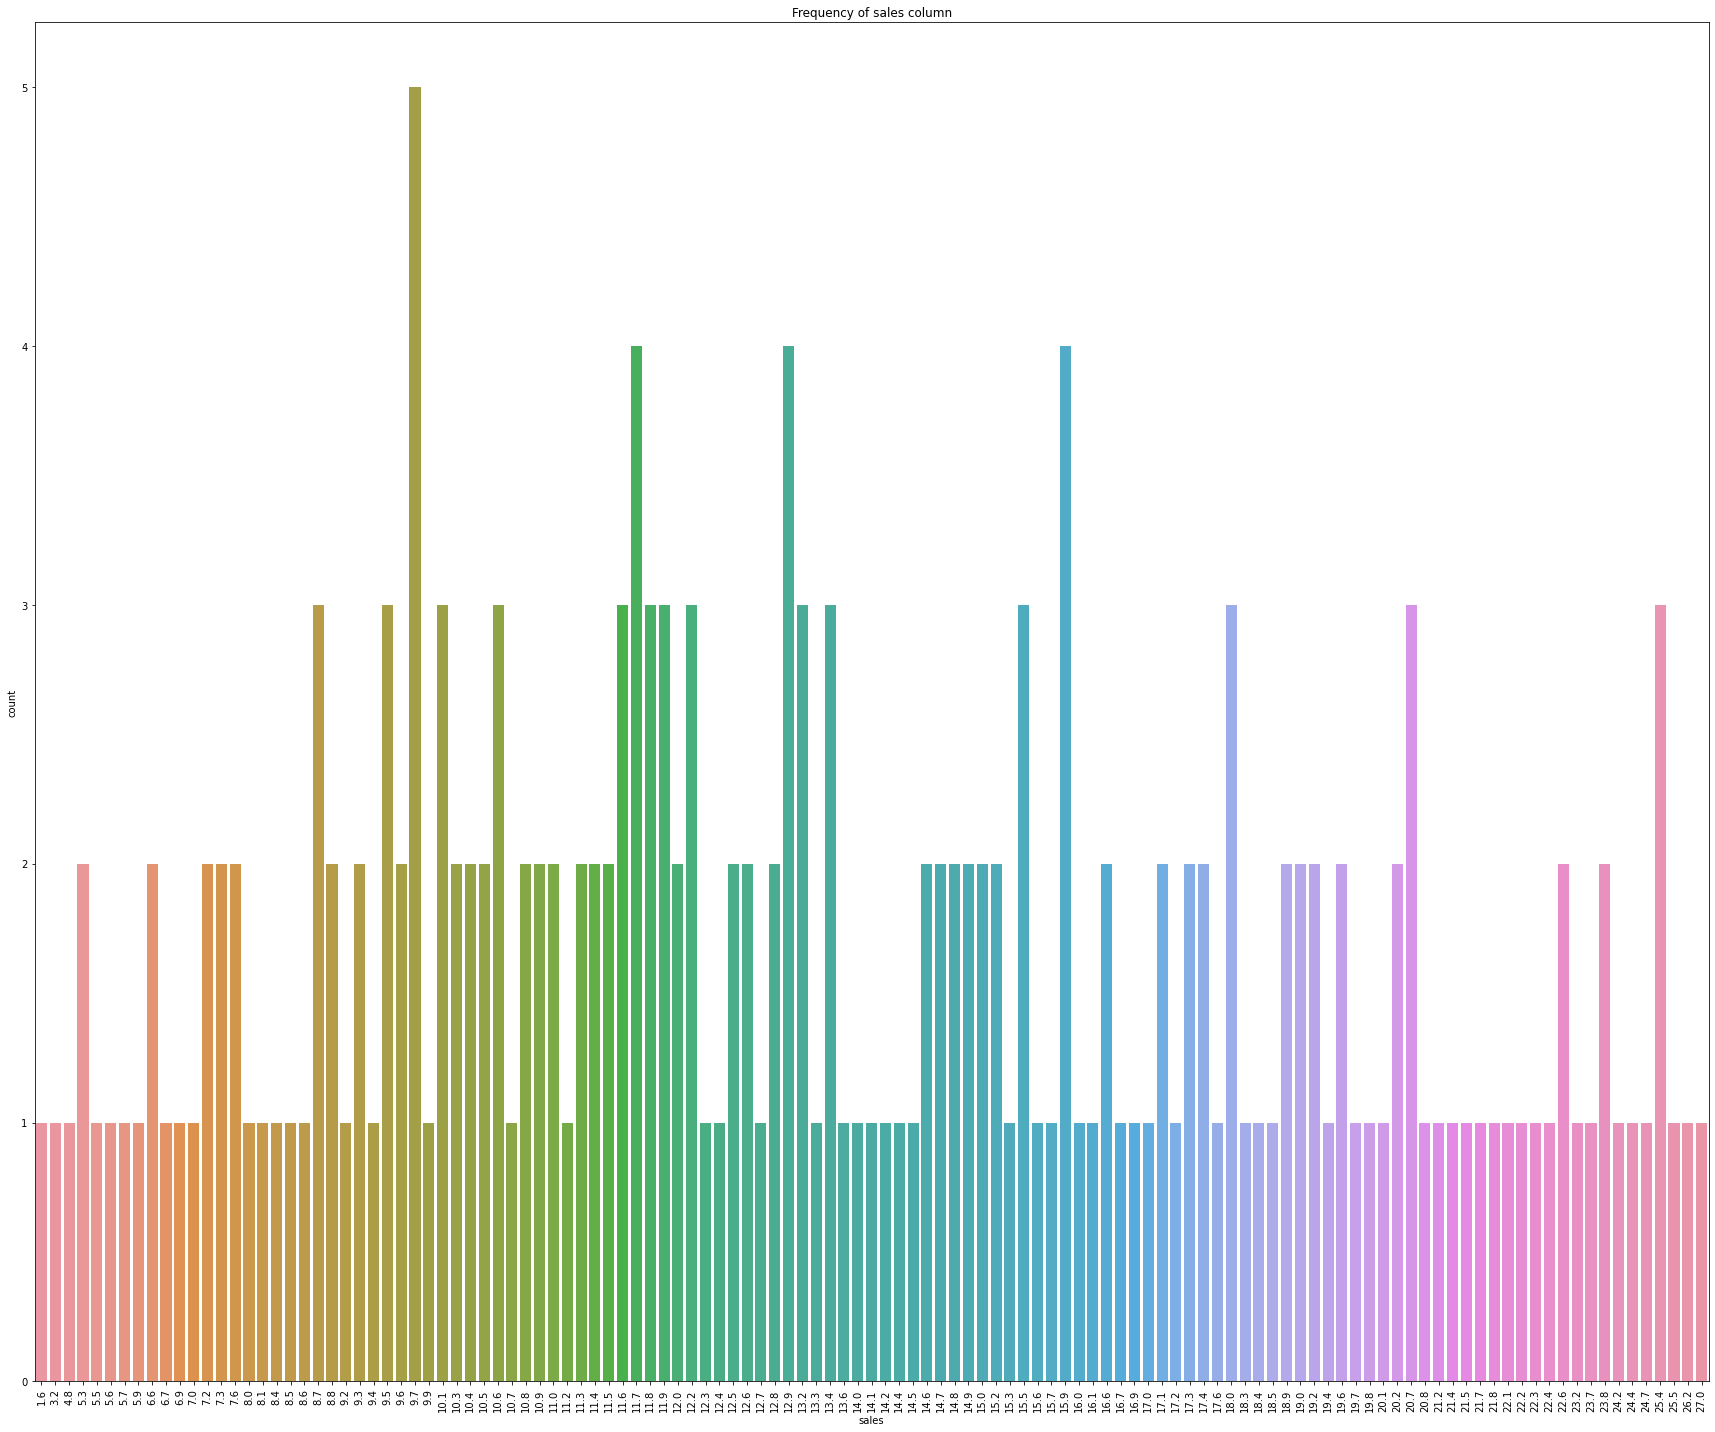

In [27]:
plt.figure(figsize=(30,25))
sns.countplot(df['sales'])
plt.xticks(rotation=90)
plt.title('Frequency of sales column')

- As you can see, every vintage is allotted an overall score between 1.6 and 27.0 of 'sales' column,and 9.7,11.7,15.9 are the highest sales according to the above analysis.


Now before checking each of the independent variable we need to separate them from the label column. Let's do it:

In [6]:
# only taking the continuous features:
df_features=df[['TV','radio','newspaper']]

###### Let's see the frequency of the independent variables by using pie plot:

<AxesSubplot:ylabel='0'>

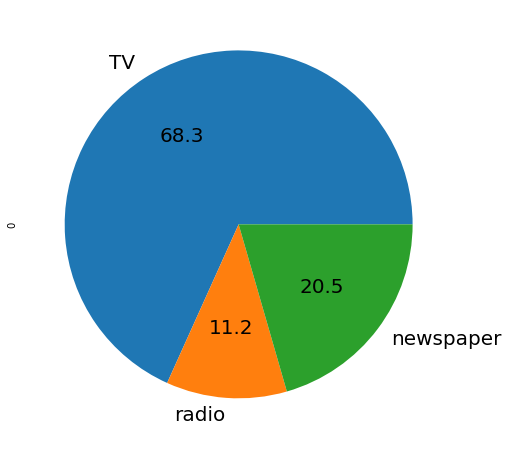

In [37]:
d=df_features.iloc[0]
d.plot.pie(autopct='%.1f',fontsize=20,figsize=(8,8))

- As we can conclude by checking the pie plot that TV (68.3%) is containg more data than radio(11.2%) and newspaper(20.5) regarding sales perspective.

Let's do other analysis as well.

###### Let's check the Distribution of these independent variables by using Distribution plot:

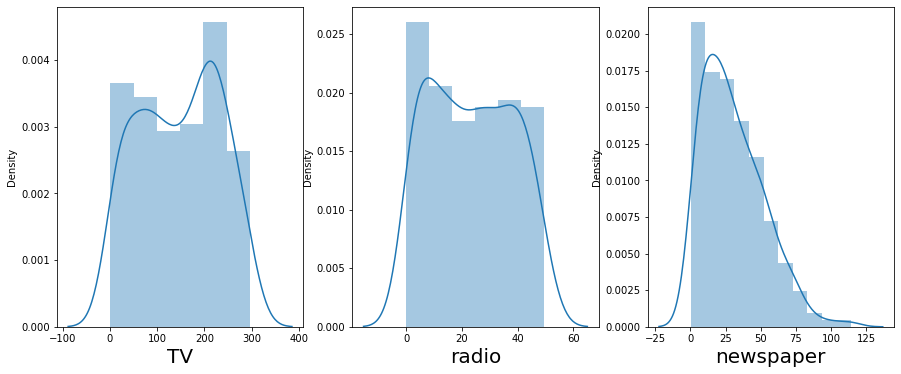

In [17]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As we can conclude by seeing these distribution plots is that,
- all the features are having little bit skewness but all of them are somewhat normally distributed.
- TV,radio,newspaper all of them are having minimum value 0, which we need to check , if it's possible or these featues are skewed.

###### Now let's check for the outliers using boxplot:


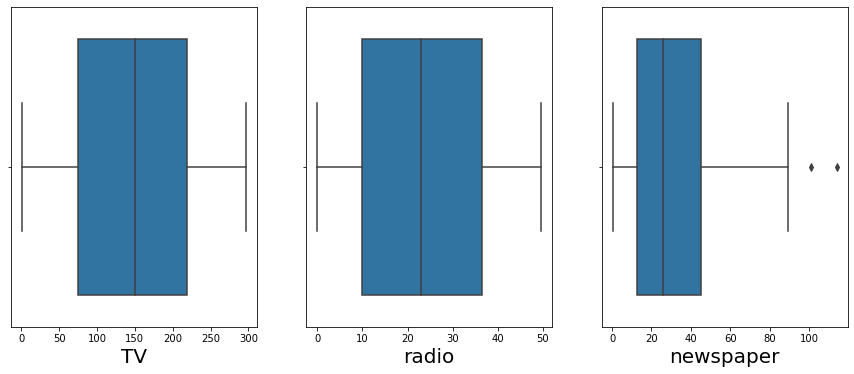

In [19]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- As we can see Two Features, TV and radio are good to go, whereas newspaper has two outliers, which we need to clear those outliers during data cleaning. 

Before checking the relations, let's divide the dataset into x and y:

In [41]:
#### dividing the feature and label for further operations:
y = df['sales']
x = df.drop(columns=['sales'])
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


As we can see Three feature columns are, TV,radio and newspaper.

- ##### Bivariate Analysis:

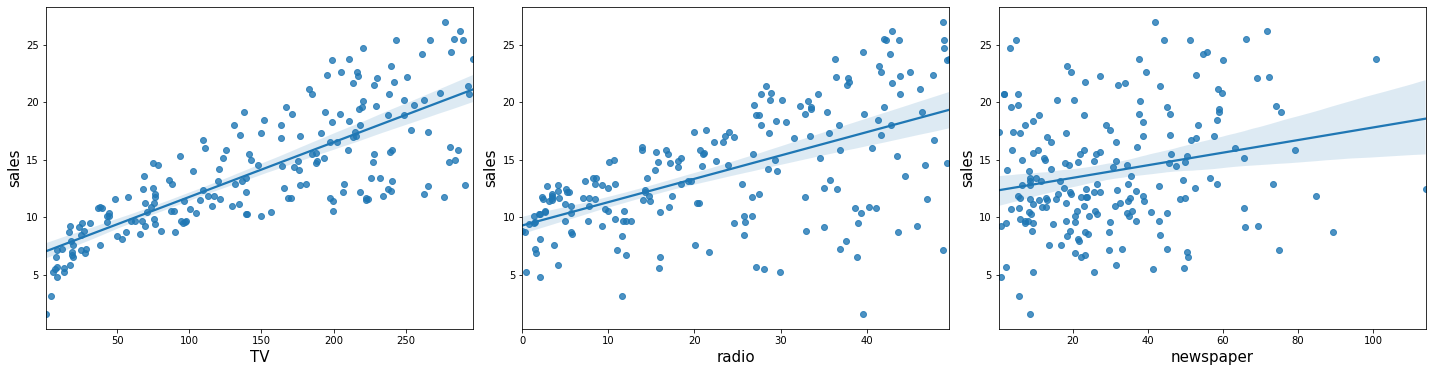

In [46]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('sales',fontsize=15)
    plotnumber+=1
plt.tight_layout()

 As we can see,
- there is a very prominent linear relation between TV and sales
- radio and sales also have somewhat linear relation
- Whereas relation between newspaper and sales is somewhat scattered, comparative to tv and radio.

Let's check the relations once more:

<Figure size 1440x1800 with 0 Axes>

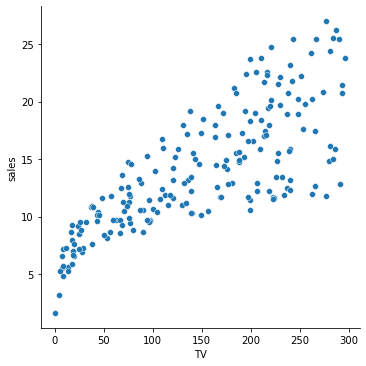

In [67]:
plt.figure(figsize=(20,25))
sns.relplot(x="TV", y="sales", data=df)

- As we can see there is actually a linear relation is noticable between TV and sales. A positive trend is on the making.

<Figure size 1440x1800 with 0 Axes>

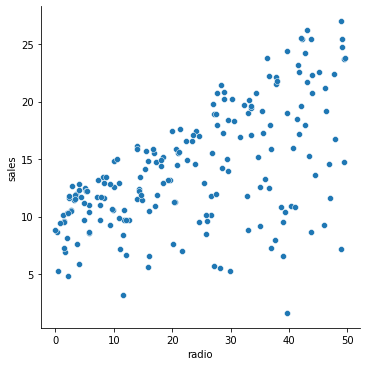

In [64]:
plt.figure(figsize=(20,25))
sns.relplot(x="radio", y="sales", data=df)

- There is somewhat a linar relation between radio and sales as there is somewhat a trend is making.

<Figure size 1440x1800 with 0 Axes>

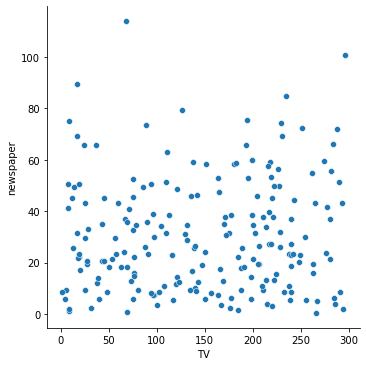

In [65]:
plt.figure(figsize=(20,25))
sns.relplot(x="TV", y="newspaper", data=df)

- No trend line we can imagine by seeing these scatter points. So we can't conclude any posisive relation between newspaper and sales.

- ##### Multivariate Analysis:

Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not

In [9]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


##### Let's check the correlation feature vs feature and feature vs label using heatmap:

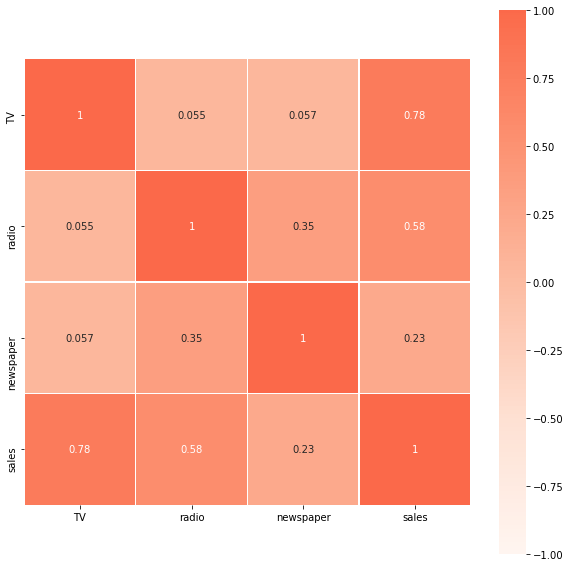

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

We can conclude by seeing the heat map is that,
- sales has a very prominent positive correlation with TV(0.78), which concludes that tv advertisement is very effective for sales.
- sales has a good positive correlation with radio(0.58),which means that radio advertisement is somewhat effective for sales.
- sales has very less correation with newspaper(0.23),that means newspaper advertisement is not that effective regarding sales.
- And there is no correlation between TV,radio and newspaper as the correlation values are very less.

Checking if the independent variables are positively or negatively correlarted with the target column once again:

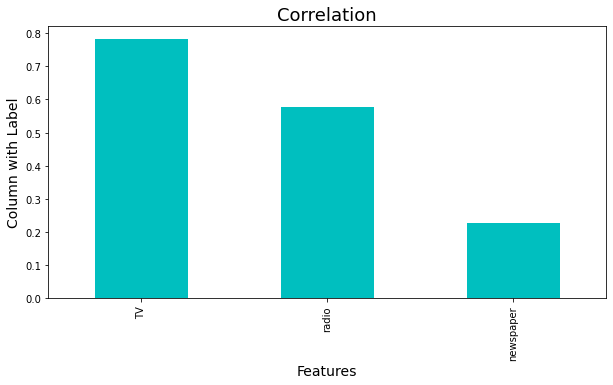

In [11]:
plt.figure(figsize=(10,5))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- As we can see there is no negative correlated data is present in this dataset

In [7]:
df.skew()

TV          -0.069853
radio        0.091961
newspaper    0.894720
sales        0.407571
dtype: float64

- So, as we can see TV has some left skewness. So we need to take care of it.

- ##### Data Cleaning:

As we can see there is very less skewness in TV column(Left skewed). radio data is good and newspaper data is more or less good. now let's remove the skewness.

- ##### Outlier Removal:

Now by using power transformer we will remove skewness from the data. By appling Power Transformer we are going to convert the features into more Normal distribution like.
But before that we will replace the Zeros(0) from columns by using mean value of that perticuler column.
Let's do it.

In [18]:
df['TV']=df['TV'].replace(0,df['TV'].mean())
df['radio']=df['radio'].replace(0,df['radio'].mean())
df['newspaper']=df['newspaper'].replace(0,df['newspaper'].mean())

In [19]:
features=['TV','radio','newspaper']

In [21]:
scaler=PowerTransformer(method='yeo-johnson')   #As we have negative skewness in TV column we are using 'yeo-johnson method'

In [22]:
df[features]=scaler.fit_transform(df[features].values)   #As power transformer is done the scaling, 
                                                        #we don't need to scale it twise

In [23]:
df[features]

,TV,radio,newspaper
0,0.948674,0.961569,1.514335
1,-1.191314,1.040555,0.787683
2,-1.647757,1.375703,1.516998
3,0.141020,1.144166,1.214656
4,0.452715,-0.768188,1.211704
...,...,...,...
195,-1.287908,-1.455094,-0.682576
196,-0.520949,-1.320102,-1.142011
197,0.413091,-0.895999,-1.313050
198,1.455843,1.179991,1.433350


- As we can see all the columns are scaled,and in same scale. So we don't need to scale it further.
Now let's see skewness has gone or not. 

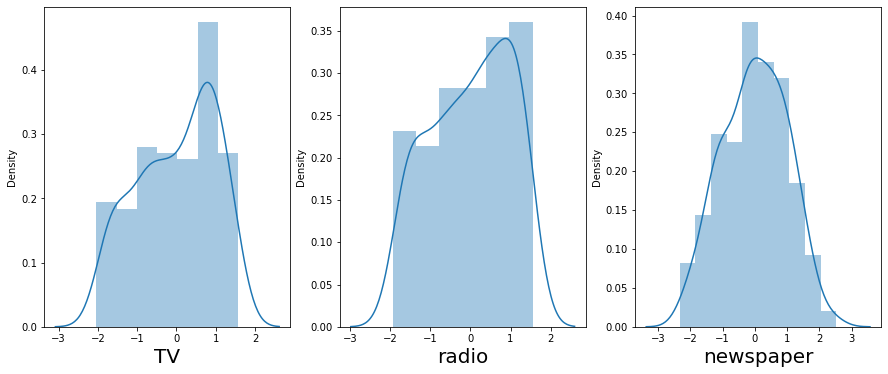

In [24]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df[features]:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- As we can see the features are looking more normal distribution like after using Power Transformer.

In [25]:
#### dividing the feature and label for further operations:
y = df['sales']
x = df.drop(columns=['sales'])
x

,TV,radio,newspaper
0,0.948674,0.961569,1.514335
1,-1.191314,1.040555,0.787683
2,-1.647757,1.375703,1.516998
3,0.141020,1.144166,1.214656
4,0.452715,-0.768188,1.211704
...,...,...,...
195,-1.287908,-1.455094,-0.682576
196,-0.520949,-1.320102,-1.142011
197,0.413091,-0.895999,-1.313050
198,1.455843,1.179991,1.433350


- We have separated the features and label.

- ##### Hold Out Method:

Model will be built on Hold Out method (75/25 training and test split) to gauge how well the Regressor is working.


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

- ### Model Creation:

Now we are going to build 6 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. SVR
4. RandomForestRegressor
5. Gradient Boosting Regressor
6. Ada-Boost Regressor

##### 1. Linear Rgression:

In [28]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [30]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.9061416649485939


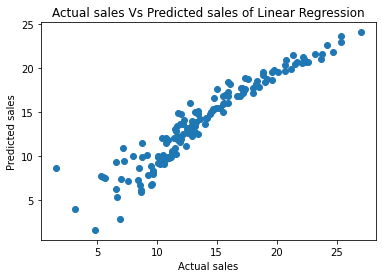

In [43]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Linear Regression')
plt.show()

In [44]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

- ###### Evaluation of LR:

In [37]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.9052153545462404
Accuracy of LR : 90.52153545462403


In [34]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  1.3371067360372138


In [35]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  3.1047465104156795


In [36]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  1.7620290889811325


- ##### Scores of Linear Regression:

1. Accuracy - 0.9052153545462404
2. MAE of LR -  1.3371067360372138
3. MSE of LR -  3.1047465104156795
4. RMSE of LR - 1.7620290889811325

#### 2. KNeighbors Regressor:

In [39]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [40]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [41]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.9530580903479645


<function matplotlib.pyplot.show(close=None, block=None)>

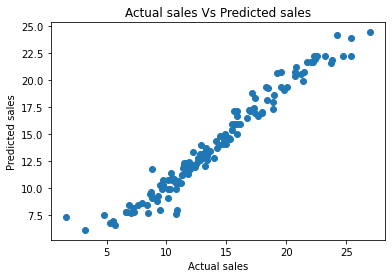

In [45]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales')
plt.show

In [46]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

- ##### Evaluation of K-Neighbors Regressor:

In [47]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of KNN :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.9394376494468338
Accuracy of KNN : 93.94376494468338


In [48]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1.1204


In [49]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  1.983767999999999


In [50]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  1.4084629920590739


- ##### Scores of K-Neighbors Regressor:

1.    Accuracy of KNN- 0.9394376494468338
2.    MAE of KNN -  1.1204
3.    MSE of KNN - 1.983767999999999
4.    RMSE of KNN - 1.4084629920590739

#### 3. Support Vector Regression (SVR) :

In [51]:
#Model Training:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [52]:
#Model Prediction with trained data:
y_svr_pred = svr.predict(x_train)

In [53]:
print("R Square Score of SVR:",metrics.r2_score(y_train,y_svr_pred))

R Square Score of SVR: 0.9196116560411145


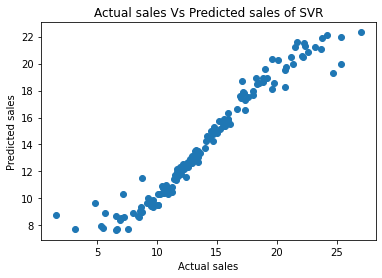

In [54]:
#Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_svr_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of SVR')
plt.show()

In [55]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

- ##### Evaluation of SVR:

In [56]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)
print('Accuracy of SVR :',svr_accuracy*100)

R Square Score of SVR: 0.909098736557433
Accuracy of SVR : 90.9098736557433


In [57]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  1.0821192658439704


In [58]:
print ('mean squared error of SVR is: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR is:  2.977543241466983


In [59]:
print ('Root mean squared error of SVR is: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR is:  1.7255559224397752


- ##### Scores of Support Vector Regression:

1.    Accuracy of SVR : 0.909098736557433
2.    MAE of SVR : 1.0821192658439704
3.    MSE of SVR : 2.977543241466983
4.    RMSE of SVR : 1.7255559224397752

#### 4. Random Forest Regressor:

In [60]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [62]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9961852035080689


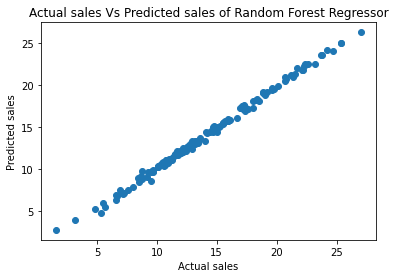

In [63]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Random Forest Regressor')
plt.show()

In [64]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

- ##### Evaluation of Random Forest Regressor:

In [65]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.9788462243445406
Accuracy of RFR : 97.88462243445406


In [66]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  0.6848799999999972


In [67]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  0.6929087599999957


In [68]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  0.832411412704076


- ##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.9788462243445406
2.    MAE of RFR :  0.6848799999999972
3.    MSE of RFR : 0.6929087599999957
4.    RMSE of RFR : 0.832411412704076

#### 5. Gradient Boosting Regressor:

In [69]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [70]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [71]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.9988022941330488


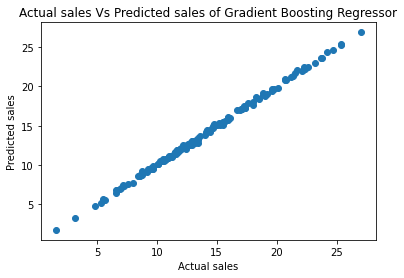

In [72]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Gradient Boosting Regressor')
plt.show()

In [73]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

- ##### Evaluation of Gradient Boosting Regressor:

In [74]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.9852260640840832
Accuracy of GBR : 98.52260640840832


In [75]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  0.5578982880690241


In [76]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  0.4839320309788439


In [77]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  0.6956522342225632


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.9852260640840832
2.    MAE of GBR : 0.5578982880690241
3.    MSE of GBR : 0.4839320309788439
4.    RMSE of GBR : 0.6956522342225632

#### 6. Ada-Boost Regressor:

In [80]:
# Model Training:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [81]:
#Model Prediction with trained data:
y_abr_pred = abr.predict(x_train)

In [82]:
print("R Square Score of Ada-Boost Regressor:",metrics.r2_score(y_train,y_abr_pred))

R Square Score of Ada-Boost Regressor: 0.9752580843932034


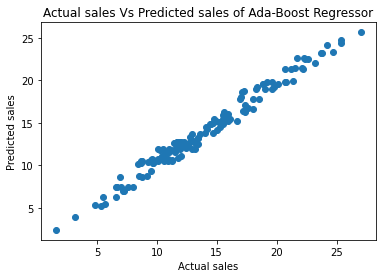

In [83]:
#Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_abr_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Ada-Boost Regressor')
plt.show()

In [84]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

- ##### Evaluation of Ada-Boost Regressor:

In [86]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of Ada-Boost Regressor:",abr_accuracy)
print('Accuracy of ABR :',abr_accuracy*100)

R Square Score of Ada-Boost Regressor: 0.9555976606841581
Accuracy of ABR : 95.55976606841581


In [87]:
print ('mean absolute error of Ada-Boost Regressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of Ada-Boost Regressor:  0.9766344522746799


In [88]:
print ('mean squared error of Ada-Boost Regressor​ is: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of Ada-Boost Regressor​ is:  1.4544339685524974


In [89]:
print ('Root mean squared error of Ada-Boost Regressor​ is: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of Ada-Boost Regressor​ is:  1.2059991577743732


- ##### Scores of Ada-Boost Regressor:

1.    Accuracy of ABR : 0.9555976606841581
2.    MAE of ABR : 0.9766344522746799
3.    MSE of ABR : 1.4544339685524974
4.    RMSE of ABR : 1.2059991577743732

- As we can see before regularization and Cross validation Gradient Boosting Regressor is showing the best accuracy overall. Now let's check which one is the best model after Cross validation also.

- ##### Regularization:
When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.

- ##### Regularization using Lasso:

In [90]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [91]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.005100144397728878

In [92]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005100144397728878)

In [93]:
lasso_reg.score(x_test,y_test)

0.9054802463733053

- ##### Regularization Using Ridge:

In [95]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [96]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [97]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [98]:
ridge_model.score(x_test,y_test)

0.9052169964655862

- Both Lasso and Ridge is giving score of 90%. So, there is no overfitting problem present as such. Let's check overfitting once again using Cross Validation also.

- #### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

- ##### CV of Linear Regression:

In [108]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.84068033 0.92468825 0.87603038 0.9272771  0.89961382]
mean : 89.36579780689087


- ##### CV of K-Neighbors Regressor:

In [102]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.85296483 0.91240125 0.94095981 0.9155791  0.93704344]
mean : 91.17896882473799


- ##### CV of SVR:

In [103]:
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean()*100)

[0.82873556 0.85279182 0.9594491  0.82777804 0.91812936]
mean : 87.73767769251425


- ##### CV of Random Forest Regressor:

In [104]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.95195166 0.9787672  0.93072989 0.9823446  0.98307571]
mean : 96.53738123237767


- ##### CV of Gradient Boosting Regressor:

In [105]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.9623657  0.98306244 0.96062203 0.98475779 0.98760854]
mean : 97.56833005936689


- ##### CV of Ada-Boost Regressor:

In [107]:
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean()*100)

[0.92661798 0.96038495 0.88219281 0.96516194 0.96265602]
mean : 93.94027380681527


- #### Selection of the best model for Advertising Sales Channel Prediction:
 Now as we are bit confused as most of the models are showing almost same accuracy. Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 6 models.

1. LR = 90.521-89.365 = 1.156, 
2. KNN = 93.943-91.178 = 2.765, 
3. SVR = 90.909-87.737 = 3.172,
4. RFR = 97.884-96.537 = 1.347, 
5. GBR = 98.522-97.568= 0.954,
6. ABR = 95.559-93.940= 1.619

- ##### Observation:

 Overall the result of all models are good. As most of the Accuracy of the Models are between 90-98%.
So, as the difference of Accuracy Score and CV of Gradient Boosting Regressor is least, it's the best Model according to the result.
 

- ##### Hyperparameter Tuning:

 Now we will use Grid Search Technique to tune the hyperparameter of Gradient Boosting Regressor. After getting the best parameters we can put those into the model to obtain the best accuracy.

- ##### parameter Tuning using GridSearchCV:

In [112]:
gbr = GradientBoostingRegressor()
search_grid = {'n_estimators':[200,500,1000,2000],
             'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4],
               'subsample':[.5,.75,1],'random_state':[1]}

In [113]:
gbr_search=GridSearchCV(gbr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1000,
                          random_state=1, subsample=0.5)

In [114]:
gbr= GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=1000, random_state=1,
                          subsample=0.5) 
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [115]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
99.19553200409764


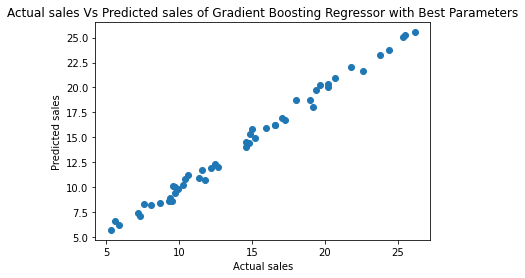

In [116]:
# Checking Actual sales Vs Predicted sales using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales Vs Predicted sales of Gradient Boosting Regressor with Best Parameters')
plt.show()

- ##### Observation:
After hyperparameter tuning with best parameters Gradient Boosting Regressor is giving the best accuracy of 99.19%. So, we are going to save Gradient Boosting Regressor Model for Advertising Sales Channel Prediction.

In [117]:
# model prediction using Gradient Boosting Regressor
x_predict = list(gbr.predict(x_test))
gbr_sales = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(gbr_sales))

     predicted_values  orignal_values
144         10.964287            11.4
9           11.178012            10.6
17          23.739146            24.4
20          18.747938            18.0
45          15.287683            14.9
6           10.721838            11.8
52          21.624523            22.6
91           7.108789             7.3
129          9.380330             9.7
183         25.539568            26.2
21          12.349683            12.5
42          20.919270            20.7
105         18.067382            19.2
145         10.250741            10.3
87          15.915393            16.0
152         16.284402            16.6
124         20.264595            19.7
92          19.749117            19.4
101         23.264699            23.8
13          10.046795             9.7
108          5.709222             5.3
75           8.433510             8.7
40          16.276536            16.6
198         25.235216            25.5
191          9.811940             9.9
192         

In [118]:
#importing joblib
import joblib

joblib.dump(gbr,'gbr_sales.obj')

# SAVING THE MODEL

['gbr_sales.obj']

In [119]:
gbr_from_joblib=joblib.load('gbr_sales.obj')
gbr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([10.96428721, 11.17801235, 23.73914552, 18.74793768, 15.28768291,
       10.7218376 , 21.62452318,  7.1087891 ,  9.38033037, 25.53956834,
       12.34968349, 20.91927031, 18.06738201, 10.25074089, 15.91539325,
       16.28440213, 20.26459526, 19.7491169 , 23.26469936, 10.04679547,
        5.70922223,  8.43350959, 16.27653594, 25.23521645,  9.81194   ,
        6.21774338, 16.70760584,  8.91509834,  8.56620535, 12.04097011,
       14.5003178 , 10.77204923, 25.03967075,  6.60606279, 14.44950776,
        8.17404889,  8.62747817, 16.95901494, 10.12283042, 20.36126638,
       20.04333624, 22.07460488, 14.06001745, 18.74948373,  7.41275623,
       14.9559644 , 11.94453772,  8.34892363, 15.852432  , 11.71905001])

- ##### Conclusion:

 This dataset is all about spending on advertising through different media like TV,Radio and Newspaper. The goal is to predict how the expense of each these media affects the sales and is there any way to optimize the Sale or not.
 By analyzing the independent variables we got to know that TV has a good linear relation with sales that means people maybe consider buying things by seeing TV advertisements, by that sales got a push. Radio advertisement also has a somewhat good relation regarding sales. But after analysing the features we can conclude Newspaper advertisement has little effect on sales. 
 After analysing the data we have made 6 models out of which Gradient Boosting Regressor has given us the best accuracy of 98.5%, So we did tune the model once again with its best parameters and obtain the best accuracy of 99%.
 